In [15]:
using Pkg
Pkg.activate("../")
using EasyStream, DataFrames, CSVFiles, Plots, MLJ
include("/home/coiote/.julia/dev/MClassifier/src/MClassification.jl")
@load DecisionTreeClassifier;
@load KNNClassifier;

  0.000266 seconds (1.85 k allocations: 99.078 KiB)


 Activating environment at `~/Codes/jl/EasyStream/Project.toml`
┌ Info: A model type "DecisionTreeClassifier" is already loaded. 
│ No new code loaded. 
└ @ MLJModels /home/coiote/.julia/packages/MLJModels/R0Y04/src/loading.jl:43
┌ Info: A model type "KNNClassifier" is already loaded. 
│ No new code loaded. 
└ @ MLJModels /home/coiote/.julia/packages/MLJModels/R0Y04/src/loading.jl:43


In [13]:
using EasyStream

In [2]:
path = "../datasets/sinthetic/"
dataset = CSVFiles.load(path * "1CDT.csv", header_exists=false) |> DataFrame
samples = Matrix{Float64}(dataset[:,1:end-1])
labels = categorical(dataset[:,end]);

In [3]:
stream = EasyStream.Stream(500, 150, samples, labels);

In [4]:
mClassifier = MClassification.MClassifier();
EasyStream.run(stream, mClassifier);

┌ Info: Training Machine{MClassifier} @ 1…13.
└ @ MLJBase /home/coiote/.julia/packages/MLJBase/t7MaX/src/machines.jl:179


In [16]:
evaluation_result = EasyStream.evaluate(stream, labels, mClassifier, measure = accuracy)
println(evaluation_result)

┌ Info: Training Machine{MClassifier} @ 7…77.
└ @ MLJBase /home/coiote/.julia/packages/MLJBase/t7MaX/src/machines.jl:179


[0.9987381703470032]


┌ Info: Training Machine{MClassifier} @ 5…34.
└ @ MLJBase /home/coiote/.julia/packages/MLJBase/t7MaX/src/machines.jl:179
┌ Warning: The scitype of `X`, in `machine(model, X, y)` or `machine(model, X, y, w)` is incompatible with `model`:
│ scitype(X) = AbstractArray{Continuous,2}
│ input_scitype(model) = ScientificTypes.Table{#s13} where #s13<:(AbstractArray{#s12,1} where #s12<:Continuous). 
└ @ MLJBase /home/coiote/.julia/packages/MLJBase/t7MaX/src/machines.jl:54
┌ Info: Training Machine{KNNClassifier} @ 8…32.
└ @ MLJBase /home/coiote/.julia/packages/MLJBase/t7MaX/src/machines.jl:179
┌ Warning: The scitype of `X`, in `machine(model, X, y)` or `machine(model, X, y, w)` is incompatible with `model`:
│ scitype(X) = AbstractArray{Continuous,2}
│ input_scitype(model) = ScientificTypes.Table{#s13} where #s13<:Union{AbstractArray{#s12,1} where #s12<:Continuous, AbstractArray{#s12,1} where #s12<:Count, AbstractArray{#s12,1} where #s12<:OrderedFactor}. 
└ @ MLJBase /home/coiote/.julia/packages/

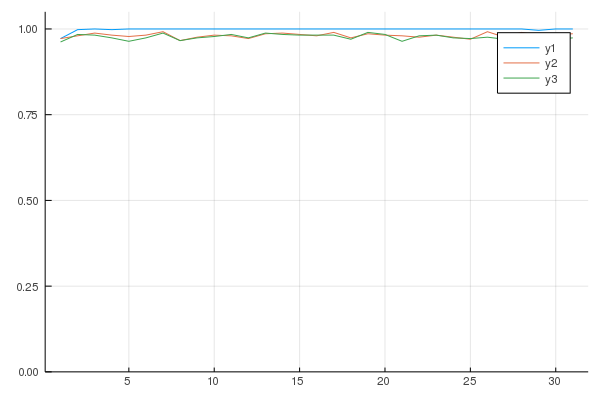

In [6]:
knnClassifier = KNNClassifier(K=3)
dicisionTreeClassifier = DecisionTreeClassifier()
evaluation_result = EasyStream.evaluate(stream, labels, [mClassifier, knnClassifier, dicisionTreeClassifier], graph=true)
evaluation_result[2]